In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.3.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

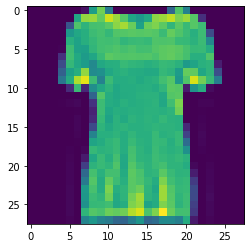

In [7]:
plt.imshow(X_train_full[10])

In [8]:
y_train_full[0]

9

In [9]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

In [11]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data Normalization
We then normalize the data dimensions so that they are of approximately the same scale

In [12]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

## Split the data into train/validation/test datasets
In earlier step of importing the data. we had 60000 datasets for training and 10000 test datasets. Now we further split the training data into train/validation. Here is how each type of dataset is used in deep learning.

 1. Training data - used for training the model
 2. validation data - used for tuning the hyperparameters and evaluate the models
 3. Test data - used to test the model after the model has gone through initial vetting by the validation set

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create the model architecture
There are two APIs for defining a model Keras:

1. Sequential model API 
2. Functional API

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential()

In [17]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


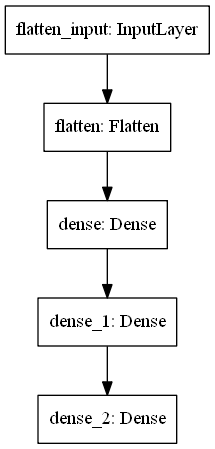

In [19]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [27]:
model_history = model.fit(X_train,y_train,epochs=30,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5288 - val_accuracy: 0.8002
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4125 - accuracy: 0.8566 - val_loss: 0.3917 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3754 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8675 - val_loss: 0.3711 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3628 - val_accuracy:

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.7236781120300293,
  0.4843234121799469,
  0.4392510652542114,
  0.4125484228134155,
  0.3939230144023895,
  0.3752800524234772,
  0.3633469343185425,
  0.35183185338974,
  0.341606080532074,
  0.33224838972091675,
  0.3242535889148712,
  0.3150951564311981,
  0.3082314729690552,
  0.30223289132118225,
  0.2947470545768738,
  0.2891886830329895,
  0.28397655487060547,
  0.27792274951934814,
  0.2729548513889313,
  0.2676164209842682,
  0.26247265934944153,
  0.2576461434364319,
  0.2536616325378418,
  0.24837879836559296,
  0.24437201023101807,
  0.24068713188171387,
  0.23627017438411713,
  0.2326742261648178,
  0.22863155603408813,
  0.2251964807510376],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8454909324645996,
  0.8565636277198792,
  0.8619636297225952,
  0.8675090670585632,
  0.8713818192481995,
  0.8748727440834045,
  0.8787272572517395,
  0.8822181820869446,
  0.883472740650177,
  0.8863999843597412,
  0.8894909024238586,
  0.8912909030914307,
  0.8

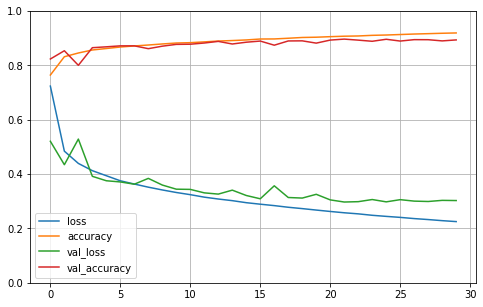

In [31]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8816


[0.33709385991096497, 0.881600022315979]

In [37]:
X_new = X_test[:3]

In [38]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


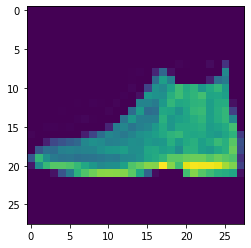

In [42]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


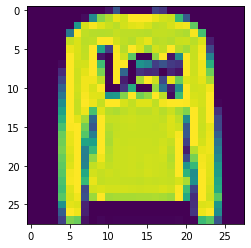

In [43]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


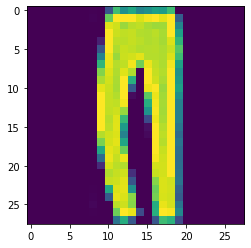

In [44]:
print(plt.imshow(X_test[2]))